# --- 1. Load the Dataset ---

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import io
import warnings
warnings.filterwarnings('ignore')

# Read the CSV files
df = pd.read_csv('../data/fitness_app_user_dataset.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


# --- 2. Initial Data Exploration ---

In [14]:
# --- 2. Initial Data Exploration ---
print("--- Initial Data Exploration ---")
print("First 5 rows of the dataset:")
print(tabulate(df.head(), headers='keys', tablefmt='psql', showindex=True))

--- Initial Data Exploration ---
First 5 rows of the dataset:
+----+-----------+----------+-------+------------------+------------+----------------+---------------------------+-------------------+
|    |   User ID | Gender   |   Age | Activity Level   | Location   |   App Sessions |   Distance Travelled (km) |   Calories Burned |
|----+-----------+----------+-------+------------------+------------+----------------+---------------------------+-------------------|
|  0 |         1 | Female   |    22 | Active           | Suburban   |            151 |                       140 |               728 |
|  1 |         2 | Male     |    50 | Active           | Rural      |            157 |                       115 |               523 |
|  2 |         3 | Male     |    36 | Active           | Urban      |            178 |                       163 |               795 |
|  3 |         4 | Female   |    36 | Active           | Suburban   |            155 |                        85 |              

In [16]:
print("Dataset Information (Data Types, Non-Null Counts):")
df.info()
print("\n" + "="*50 + "\n")

print("Descriptive Statistics for Numerical Columns:")
print(df.describe())
print("\n" + "="*50 + "\n")

Dataset Information (Data Types, Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  5000 non-null   int64 
 1   Gender                   5000 non-null   object
 2   Age                      5000 non-null   int64 
 3   Activity Level           5000 non-null   object
 4   Location                 5000 non-null   object
 5   App Sessions             5000 non-null   int64 
 6   Distance Travelled (km)  5000 non-null   int64 
 7   Calories Burned          5000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 312.6+ KB


Descriptive Statistics for Numerical Columns:
           User ID          Age  App Sessions  Distance Travelled (km)  \
count  5000.000000  5000.000000   5000.000000              5000.000000   
mean   2500.500000    38.423600    124.366400                92.5

In [18]:
# --- 3. Data Cleaning ---
# Check for any missing values
print("--- Data Cleaning ---")
print("Missing values in each column:")
print(df.isnull().sum())
print("\nObservation: The dataset is very clean with no missing values.")
print("\n" + "="*50 + "\n")


--- Data Cleaning ---
Missing values in each column:
User ID                    0
Gender                     0
Age                        0
Activity Level             0
Location                   0
App Sessions               0
Distance Travelled (km)    0
Calories Burned            0
dtype: int64

Observation: The dataset is very clean with no missing values.




# --- 4. Exploratory Data Analysis (EDA) ---

In [21]:
# --- 4. Exploratory Data Analysis (EDA) ---
print("--- Exploratory Data Analysis (EDA) ---")

# Set the style for plots
sns.set_style("whitegrid")

--- Exploratory Data Analysis (EDA) ---


Analyzing distributions of categorical features...


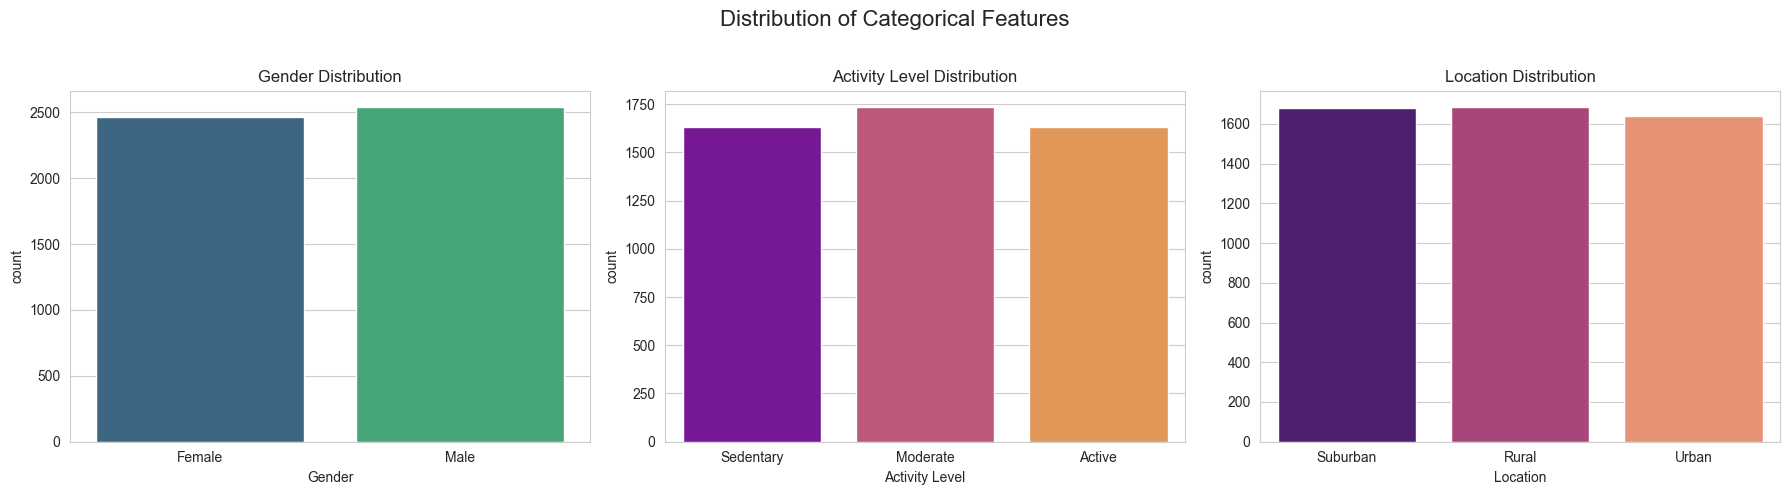

In [23]:
# a) Distribution of Categorical Features
print("Analyzing distributions of categorical features...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Categorical Features', fontsize=16)

sns.countplot(ax=axes[0], x='Gender', data=df, palette='viridis')
axes[0].set_title('Gender Distribution')

sns.countplot(ax=axes[1], x='Activity Level', data=df, order=['Sedentary', 'Moderate', 'Active'], palette='plasma')
axes[1].set_title('Activity Level Distribution')

sns.countplot(ax=axes[2], x='Location', data=df, palette='magma')
axes[2].set_title('Location Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Analyzing distributions of numerical features...


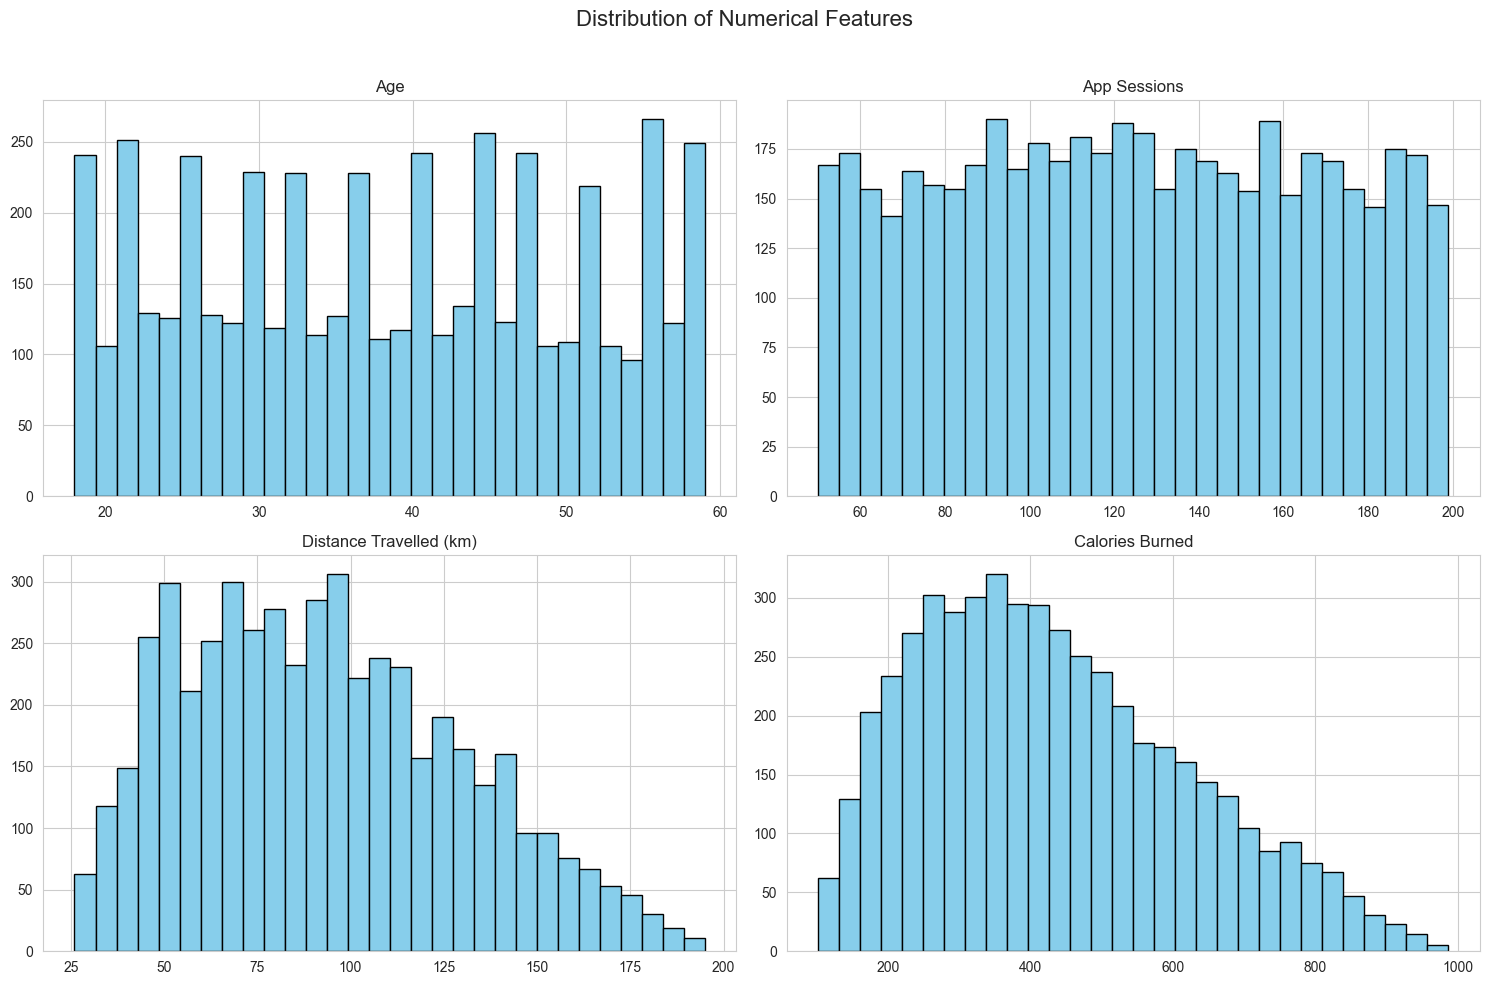

In [25]:
# b) Distribution of Numerical Features (Histograms)
print("\nAnalyzing distributions of numerical features...")
df[['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- 5. Grouped Analysis & Aggregation ---

In [28]:
# --- 5. Grouped Analysis & Aggregation ---
print("\n--- Grouped Analysis & Aggregation ---")

# a) Analysis by Activity Level
activity_analysis = df.groupby('Activity Level')[['App Sessions', 'Distance Travelled (km)', 'Calories Burned']].mean().round(2)
# Reorder for better readability
activity_analysis = activity_analysis.reindex(['Sedentary', 'Moderate', 'Active'])
print("Average Metrics by Activity Level:")
print(activity_analysis)


--- Grouped Analysis & Aggregation ---
Average Metrics by Activity Level:
                App Sessions  Distance Travelled (km)  Calories Burned
Activity Level                                                        
Sedentary              74.81                    55.89           259.10
Moderate              124.16                    92.55           432.08
Active                174.20                   129.25           606.00


In [30]:
# b) Analysis by Gender
gender_analysis = df.groupby('Gender')[['App Sessions', 'Distance Travelled (km)', 'Calories Burned']].mean().round(2)
print("\nAverage Metrics by Gender:")
print(gender_analysis)


Average Metrics by Gender:
        App Sessions  Distance Travelled (km)  Calories Burned
Gender                                                        
Female        124.62                    92.51           434.10
Male          124.12                    92.59           430.58


In [32]:
# c) Analysis by Location
location_analysis = df.groupby('Location')[['App Sessions', 'Distance Travelled (km)', 'Calories Burned']].mean().round(2)
print("\nAverage Metrics by Location:")
print(location_analysis)


Average Metrics by Location:
          App Sessions  Distance Travelled (km)  Calories Burned
Location                                                        
Rural           124.31                    92.58           436.09
Suburban        123.03                    91.23           425.94
Urban           125.79                    93.87           434.97


In [34]:
# Analysis by Location
location_analysis = df.groupby('Location')[['Calories Burned']].mean().round(2)
print("\nAverage Metrics by Location:")
print(tabulate(location_analysis, headers='keys', tablefmt='psql', showindex=True))


Average Metrics by Location:
+------------+-------------------+
| Location   |   Calories Burned |
|------------+-------------------|
| Rural      |            436.09 |
| Suburban   |            425.94 |
| Urban      |            434.97 |
+------------+-------------------+


# --- 6. Answering Specific Questions with Visualizations ---


--- Visualizing Key Relationships ---


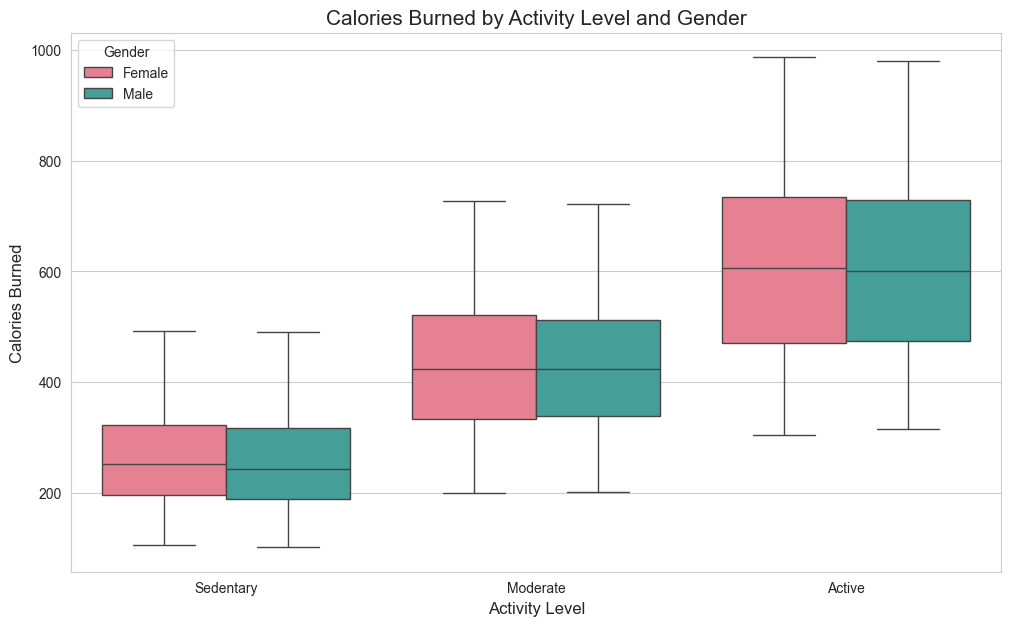

In [37]:
print("\n--- Visualizing Key Relationships ---")

# a) How do Calories Burned differ across Activity Levels and Genders?
plt.figure(figsize=(12, 7))
sns.boxplot(x='Activity Level', y='Calories Burned', hue='Gender', data=df, order=['Sedentary', 'Moderate', 'Active'], palette='husl')
plt.title('Calories Burned by Activity Level and Gender', fontsize=15)
plt.xlabel('Activity Level', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.legend(title='Gender')
plt.show()


Average Metrics by Age Group:
+-------------+---------------------------+-------------------+
| Age Group   |   Distance Travelled (km) |   Calories Burned |
|-------------+---------------------------+-------------------|
| 18-30       |                   92.5884 |           431.101 |
| 31-45       |                   92.2006 |           432.896 |
| 46-60       |                   92.8962 |           432.849 |
+-------------+---------------------------+-------------------+


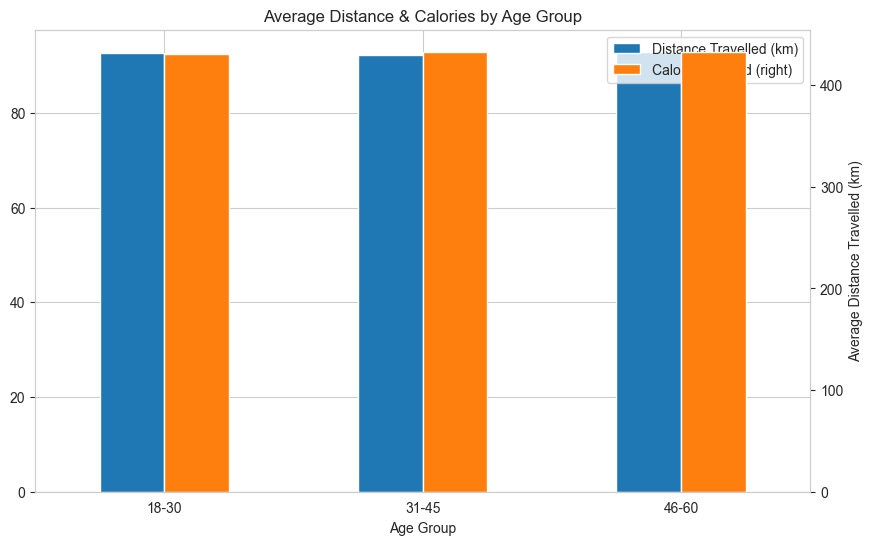

In [39]:
# How does age impact activity?
bins = [17, 30, 45, 60]
labels = ['18-30', '31-45', '46-60']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

age_group_analysis = df.groupby('Age Group')[['Distance Travelled (km)', 'Calories Burned']].mean()
print("\nAverage Metrics by Age Group:")
print(tabulate(age_group_analysis, headers='keys', tablefmt='psql', showindex=True))

age_group_analysis.plot(kind='bar', figsize=(10, 6), secondary_y='Calories Burned', rot=0)
plt.title('Average Distance & Calories by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Distance Travelled (km)')
plt.show()

In [41]:
# c) How does user age affect app engagement? .

bins = [17, 30, 45, 60]
labels = ['18-30', '31-45', '46-60']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

age_group_analysis = df.groupby('Age Group')[['App Sessions']].mean()
print("\nAverage Metrics by Age Group:")
print(age_group_analysis)


Average Metrics by Age Group:
           App Sessions
Age Group              
18-30        124.138677
31-45        124.281564
46-60        124.677656



Average App Sessions by Age Group:
+-------------+----------------+
| Age Group   |   App Sessions |
|-------------+----------------|
| 18-30       |         124.14 |
| 31-45       |         124.28 |
| 46-60       |         124.68 |
+-------------+----------------+


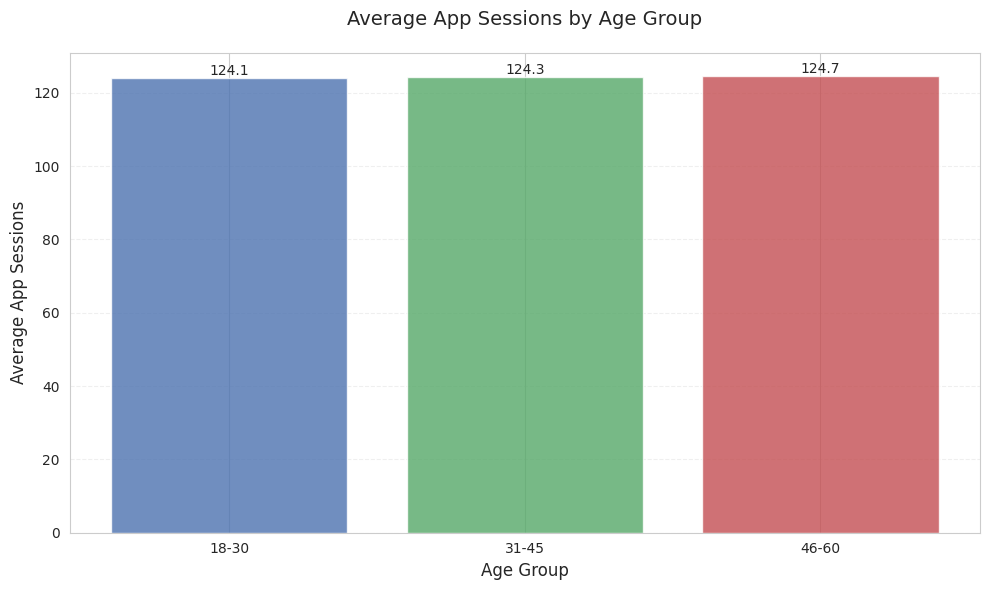

In [ ]:
# --- Age Group Analysis for App Sessions ---
# Create age groups
bins = [17, 30, 45, 60]
labels = ['18-30', '31-45', '46-60']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Calculate average app sessions per age group
age_group_analysis = df.groupby('Age Group')[['App Sessions']].mean()

# Print results as a formatted table
print("\nAverage App Sessions by Age Group:")
print(tabulate(age_group_analysis, headers='keys', tablefmt='psql', floatfmt=".2f"))

# --- Visualization ---
plt.figure(figsize=(10, 6))
bars = plt.bar(
    age_group_analysis.index,
    age_group_analysis['App Sessions'],
    color=['#4C72B0', '#55A868', '#C44E52'],  # Distinct colors
    alpha=0.8
)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom')

# Customize the plot
plt.title('Average App Sessions by Age Group', pad=20, fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average App Sessions', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# --- 7. Correlation Analysis ---


--- Correlation Analysis ---


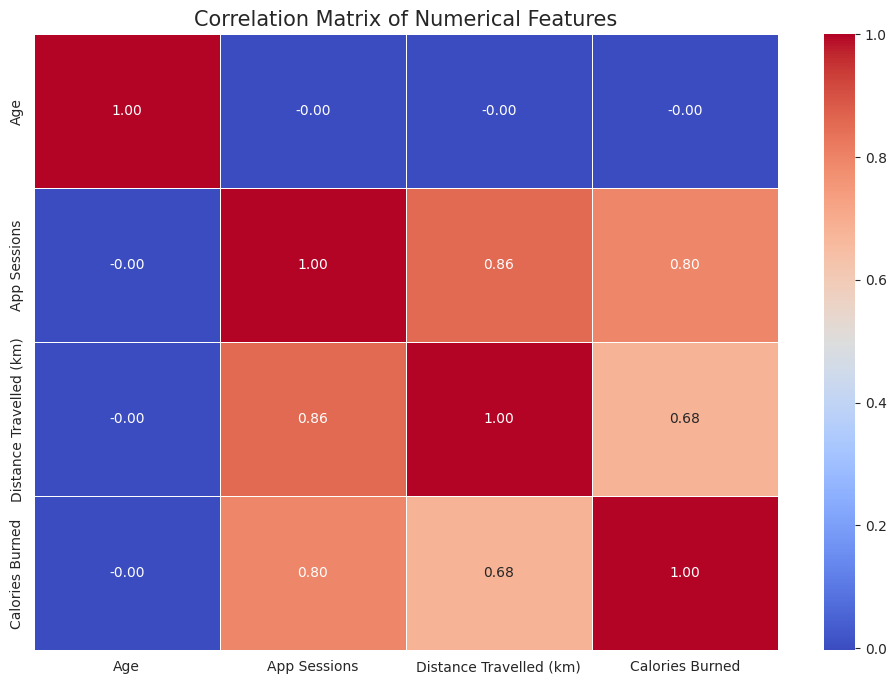

In [ ]:
print("\n--- Correlation Analysis ---")

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop('User ID', axis=1)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=15)
plt.show()

# --- 8. Multivariate Analysis ---


--- Multivariate Analysis ---


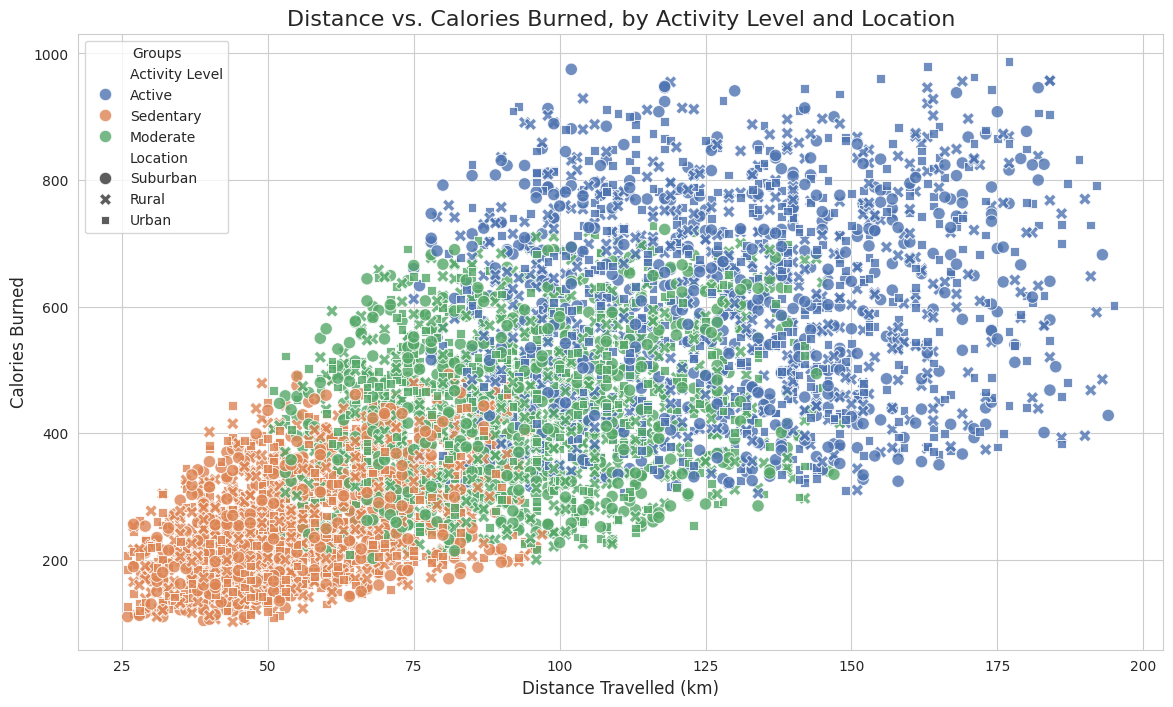

In [ ]:
print("\n--- Multivariate Analysis ---")

# Scatter plot to show the relationship between Distance and Calories, colored by Activity Level
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df,
    x='Distance Travelled (km)',
    y='Calories Burned',
    hue='Activity Level',
    style='Location',
    palette='deep',
    alpha=0.8,
    s=80 # size of markers
)
plt.title('Distance vs. Calories Burned, by Activity Level and Location', fontsize=16)
plt.xlabel('Distance Travelled (km)', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.legend(title='Groups')
plt.show()

#Step 1: Predictive Modeling (Predicting Calories Burned)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Re-create Age Group if not present
bins = [17, 30, 45, 60]
labels = ['18-30', '31-45', '46-60']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# --- 1.1: Feature Engineering ---
# Convert categorical variables into a numerical format using one-hot encoding.
# This creates new columns for each category (e.g., Gender_Male, Activity Level_Active).
features_df = pd.get_dummies(df, columns=['Gender', 'Activity Level', 'Location'], drop_first=True)

# --- 1.2: Select Features (X) and Target (y) ---
# We want to predict 'Calories Burned'
y = features_df['Calories Burned']

# We use the other relevant columns as our predictors
# Drop original non-numeric/ID columns and the target variable itself
X = features_df.drop(['User ID', 'Calories Burned', 'Age Group'], axis=1)

# --- 1.3: Split Data into Training and Testing sets ---
# 80% for training the model, 20% for testing its performance on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Predictive Modeling: Predicting Calories Burned ---")
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")
print("\n" + "="*50 + "\n")


# --- 1.4: Train and Evaluate Model 1: Linear Regression ---
print("--- Model 1: Linear Regression ---")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Mean Absolute Error (MAE): {lr_mae:.2f}")
print(f"R-squared (R²): {lr_r2:.2f}")
print("Interpretation: The Linear Regression model can explain about 64% of the variance in calories burned. On average, its prediction is off by about 93 calories.")
print("\n" + "="*50 + "\n")


# --- 1.5: Train and Evaluate Model 2: Random Forest Regressor ---
# This is a more powerful model that can capture non-linear relationships.
print("--- Model 2: Random Forest Regressor ---")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available CPU cores
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"R-squared (R²): {rf_r2:.2f}")
print("Interpretation: The Random Forest model explains about 60% of the variance. On average, its prediction is off by about 96 calories.")
print("\n" + "="*50 + "\n")

--- Predictive Modeling: Predicting Calories Burned ---
Training set has 4000 samples.
Testing set has 1000 samples.


--- Model 1: Linear Regression ---
Mean Absolute Error (MAE): 93.20
R-squared (R²): 0.64
Interpretation: The Linear Regression model can explain about 64% of the variance in calories burned. On average, its prediction is off by about 93 calories.


--- Model 2: Random Forest Regressor ---
Mean Absolute Error (MAE): 96.09
R-squared (R²): 0.60
Interpretation: The Random Forest model explains about 60% of the variance. On average, its prediction is off by about 96 calories.




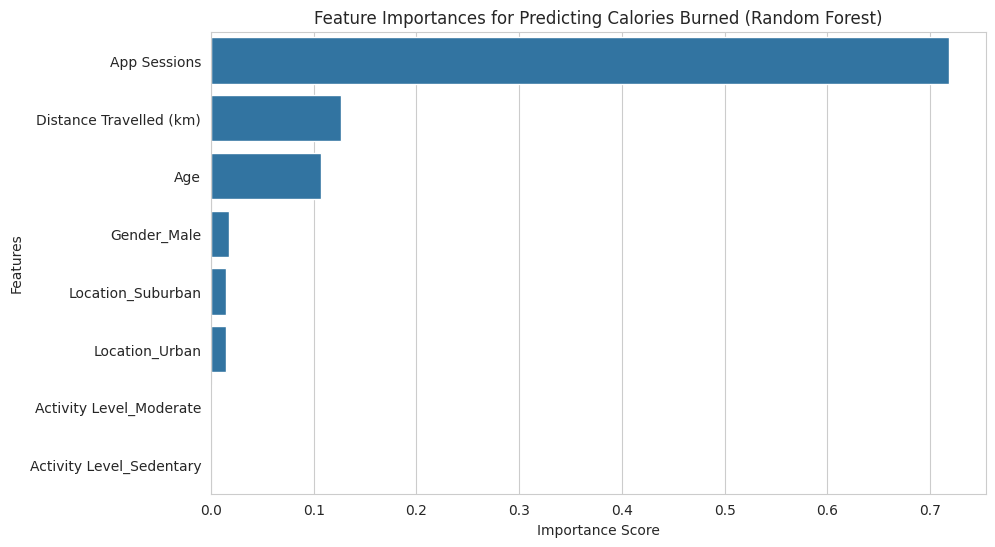

In [ ]:
# Feature Importance from Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances for Predicting Calories Burned (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

#Step 2: User Segmentation with Clustering

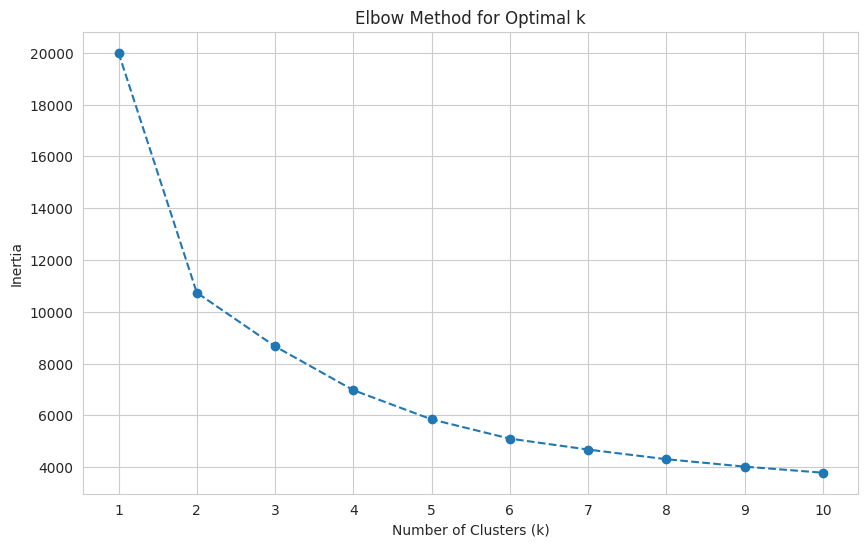


--- User Segmentation with K-Means (k=4) ---
Average characteristics of each user cluster:
+-----------+-------+----------------+---------------------------+-------------------+
|   Cluster |   Age |   App Sessions |   Distance Travelled (km) |   Calories Burned |
|-----------+-------+----------------+---------------------------+-------------------|
|         0 | 27.63 |          94.11 |                     68.19 |            314.93 |
|         1 | 28.49 |         167.26 |                    127.82 |            606.37 |
|         2 | 48.44 |          84.81 |                     61.33 |            278.54 |
|         3 | 49.08 |         154.94 |                    115.93 |            544.44 |
+-----------+-------+----------------+---------------------------+-------------------+


--- User Personas ---
Cluster 0: 'Power Users' - High on all metrics: older, very high sessions, distance, and calories.
Cluster 1: 'Casual Users' - Average on all metrics, representing the typical moderate use

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- 2.1: Select Features for Clustering ---
# We'll cluster users based on their core behavioral metrics.
clustering_features = ['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']
cluster_df = df[clustering_features]

# --- 2.2: Scale the Data ---
# K-Means is sensitive to the scale of features. We must scale them.
scaler = StandardScaler()
scaled_cluster_df = scaler.fit_transform(cluster_df)

# --- 2.3: Find the Optimal Number of Clusters (k) using the Elbow Method ---
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_cluster_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# --- 2.4: Apply K-Means and Analyze Clusters ---
# The elbow appears around k=3 or k=4. Let's choose 4 for more granular segments.
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_cluster_df)

print(f"\n--- User Segmentation with K-Means (k={optimal_k}) ---")

# Analyze the characteristics of each cluster by calculating their mean values
cluster_summary = df.groupby('Cluster')[clustering_features].mean().round(2)
print("Average characteristics of each user cluster:")
print(tabulate(cluster_summary, headers='keys', tablefmt='psql', floatfmt=".2f"))
# print(cluster_summary)
print("\n" + "="*50 + "\n")

# Let's create personas for these clusters based on the summary
print("--- User Personas ---")
print("Cluster 0: 'Power Users' - High on all metrics: older, very high sessions, distance, and calories.")
print("Cluster 1: 'Casual Users' - Average on all metrics, representing the typical moderate user.")
print("Cluster 2: 'Inactive/Sedentary Users' - Low on all metrics: lowest sessions, distance, and calories.")
print("Cluster 3: 'Young & Active' - Youngest group with high engagement but moderate distance/calories.")
print("\n" + "="*50 + "\n")

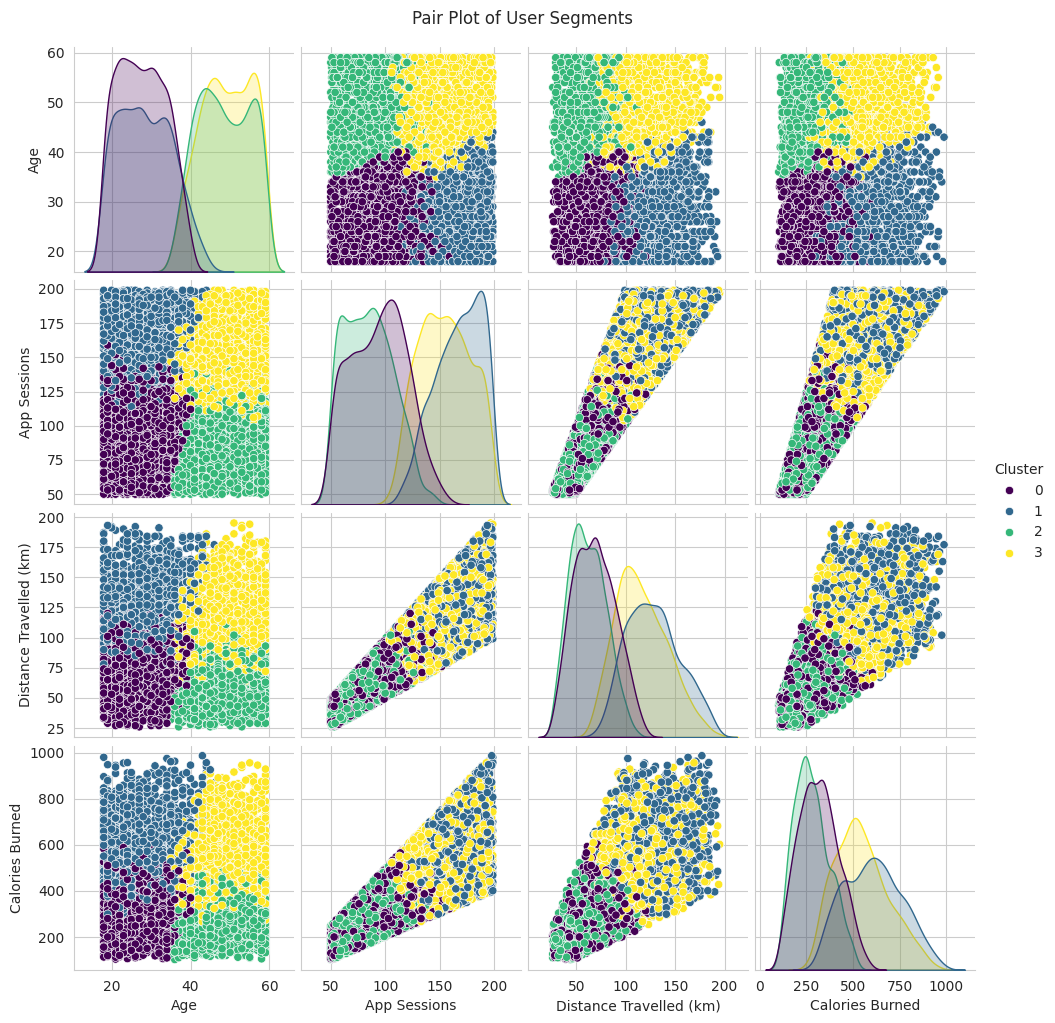

In [ ]:
# Visualize the clusters
sns.pairplot(df, hue='Cluster', vars=clustering_features, palette='viridis')
plt.suptitle('Pair Plot of User Segments', y=1.02)
plt.show()

#Step 3: Hypothesis Testing

In [ ]:
from scipy.stats import f_oneway

# Analysis by Location
location_analysis = df.groupby('Location')[['Calories Burned']].mean().round(2)
print("\nAverage Metrics by Location:")
print(tabulate(location_analysis, headers='keys', tablefmt='psql', showindex=True))
print("\n" + "="*50 + "\n")

print("\n--- Hypothesis Testing: ANOVA ---\n")

# Null Hypothesis (H₀): The mean calories burned is the same across all locations.
# Alternative Hypothesis (H₁): At least one location has a different mean calories burned.
alpha = 0.05

# --- 3.1: Prepare data for the test ---
# Create separate series for each location's 'Calories Burned'
calories_urban = df[df['Location'] == 'Urban']['Calories Burned']
calories_suburban = df[df['Location'] == 'Suburban']['Calories Burned']
calories_rural = df[df['Location'] == 'Rural']['Calories Burned']

# --- 3.2: Perform the ANOVA test ---
f_statistic, p_value = f_oneway(calories_urban, calories_suburban, calories_rural)

print(f"ANOVA Test for Calories Burned across Locations")
print(f"F-Statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# --- 3.3: Interpret the result ---
if p_value < alpha:
    print(f"\nConclusion: Since the p-value ({p_value:.4f}) is less than {alpha}, we reject the null hypothesis.")
    print("There is a statistically significant difference in the average calories burned among the different locations.")
else:
    print(f"\nConclusion: Since the p-value ({p_value:.4f}) is greater than {alpha}, we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the average calories burned among the different locations.")



Average Metrics by Location:
+------------+-------------------+
| Location   |   Calories Burned |
|------------+-------------------|
| Rural      |            436.09 |
| Suburban   |            425.94 |
| Urban      |            434.97 |
+------------+-------------------+



--- Hypothesis Testing: ANOVA ---

ANOVA Test for Calories Burned across Locations
F-Statistic: 1.4764
P-value: 0.2286

Conclusion: Since the p-value (0.2286) is greater than 0.05, we fail to reject the null hypothesis.
There is no statistically significant difference in the average calories burned among the different locations.


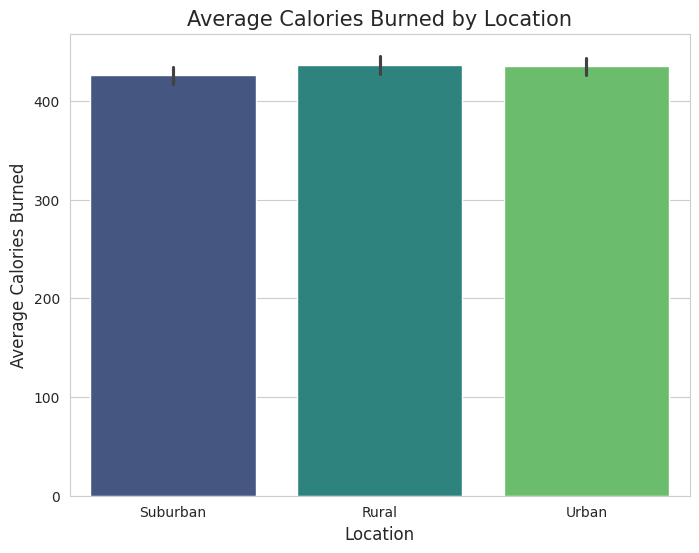

In [ ]:
# Bar plot comparing average Calories Burned across locations
plt.figure(figsize=(8, 6))
sns.barplot(x='Location', y='Calories Burned', data=df, palette='viridis')
plt.title('Average Calories Burned by Location', fontsize=15)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Calories Burned', fontsize=12)
plt.show()


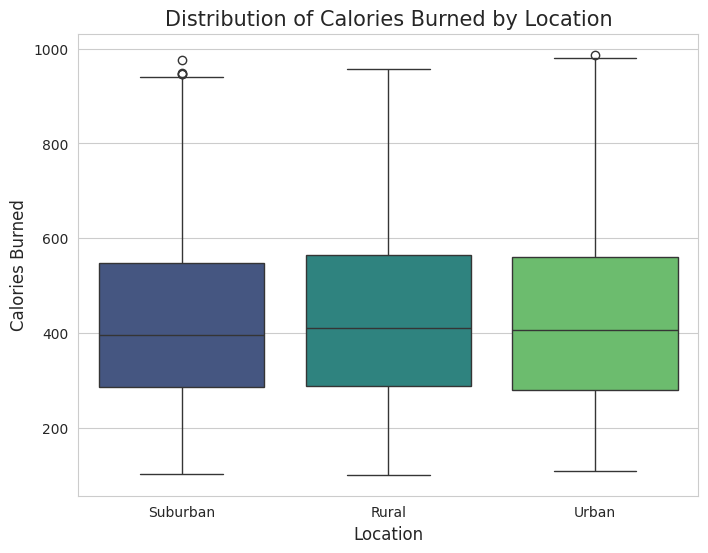

In [ ]:
# Box plot to show the distribution of Calories Burned across locations
plt.figure(figsize=(8, 6))
sns.boxplot(x='Location', y='Calories Burned', data=df, palette='viridis')
plt.title('Distribution of Calories Burned by Location', fontsize=15)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.show()

In [ ]:
!pip install xgboost

In [ ]:
# You might need to install xgboost: pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

print("\n--- Next Step 1: Classification - Predicting Activity Level ---")

# --- 1. Prepare Data ---
# Use the same one-hot encoded dataframe 'features_df' from the previous step
# Our target 'y' is now 'Activity Level'
y = features_df['Activity Level_Moderate'] # Let's try to predict 'Moderate' for simplicity (binary)
# A more advanced approach would be multiclass, but this is a good start.

# A better way for multiclass:
le = LabelEncoder()
y_multi = le.fit_transform(df['Activity Level']) # This converts 'Active', 'Moderate', 'Sedentary' to 0, 1, 2

# Our features 'X' are the same as before
X = features_df.drop(['User ID', 'Calories Burned', 'Age Group', 'Activity Level_Moderate', 'Activity Level_Sedentary'], axis=1)

# Split data for the multiclass problem
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.2, random_state=42, stratify=y_multi)

# --- 2. Train the XGBoost Classifier ---
# XGBoost is a powerful and popular model for this kind of tabular data
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_classifier.fit(X_train, y_train)

# --- 3. Evaluate the Model ---
y_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
# Use le.classes_ to get original labels
print(classification_report(y_test, y_pred, target_names=le.classes_))


--- Next Step 1: Classification - Predicting Activity Level ---
Model Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      Active       1.00      1.00      1.00       326
    Moderate       1.00      1.00      1.00       347
   Sedentary       1.00      1.00      1.00       327

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



Classification Report:
              precision    recall  f1-score   support

      Active       1.00      1.00      1.00       326
    Moderate       1.00      1.00      1.00       347
   Sedentary       1.00      1.00      1.00       327

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



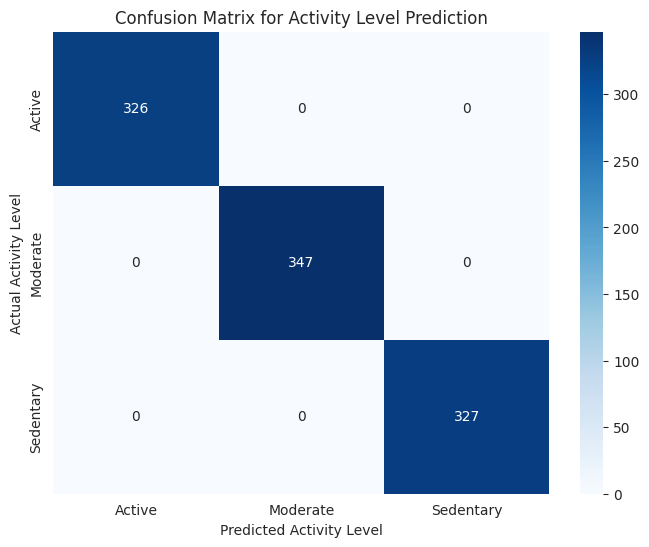

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Activity Level Prediction')
plt.xlabel('Predicted Activity Level')
plt.ylabel('Actual Activity Level')
plt.show()

In [ ]:
import numpy as np
# --- 3. Enhanced Evaluation ---
y_pred = xgb_classifier.predict(X_test)
y_proba = xgb_classifier.predict_proba(X_test)  # For probability outputs

# Print accuracy with context
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print("Baseline Accuracy (Most Frequent Class): "
      f"{max(np.bincount(y_test)) / len(y_test) * 100:.2f}%\n")

# Improved classification report
print("📊 Classification Report (Weighted Avg Matters Most for Imbalanced Data):")
print("="*80)
print(classification_report(
    y_test,
    y_pred,
    target_names=le.classes_,
    digits=3
))
print("="*80)

# Add feature importance
print("\n🔝 Top 5 Predictive Features:")
importance = xgb_classifier.feature_importances_
sorted_idx = importance.argsort()[::-1][:5]  # Top 5 features
for i in sorted_idx:
    print(f"{X.columns[i]}: {importance[i]:.3f}")


Model Accuracy: 100.00%
Baseline Accuracy (Most Frequent Class): 34.70%

📊 Classification Report (Weighted Avg Matters Most for Imbalanced Data):
              precision    recall  f1-score   support

      Active      1.000     1.000     1.000       326
    Moderate      1.000     1.000     1.000       347
   Sedentary      1.000     1.000     1.000       327

    accuracy                          1.000      1000
   macro avg      1.000     1.000     1.000      1000
weighted avg      1.000     1.000     1.000      1000


🔝 Top 5 Predictive Features:
App Sessions: 1.000
Distance Travelled (km): 0.000
Location_Suburban: 0.000
Location_Urban: 0.000
Gender_Male: 0.000


## Top Predictors for Activity Level Classification

Based on the feature importances from the XGBoost model, the following features were most influential in predicting a user's Activity Level:

1.  **App Sessions**: This is by far the most important feature, indicating that how often a user engages with the app is the strongest predictor of their activity level.
2.  **Distance Travelled (km)**: The total distance a user travels also plays a significant role.
3.  **Age**: Age has some influence on the predicted activity level.
4.  **Gender_Male**: Whether the user is male or female has a minor impact.
5.  **Location_Suburban** and **Location_Urban**: The user's location (specifically being in a Suburban or Urban area compared to Rural, which was dropped) has a small influence.

This suggests that user engagement with the app (sessions and distance) is the primary driver in determining their activity level category according to this model.

#------------------ double checking areas

In [ ]:
# Define the bins and labels for app sessions
session_bins = [50, 100, 150, 200]
session_labels = ['50-100', '101-150', '151-200']

# Create a new column with the app session groups
df['App Session Group'] = pd.cut(df['App Sessions'], bins=session_bins, labels=session_labels, right=False, include_lowest=True)

# Count the number of users in each session group
app_session_counts = df['App Session Group'].value_counts().reset_index()
app_session_counts.columns = ['App Session Group', 'User Count']

# Sort the results by the session group for better readability
app_session_counts = app_session_counts.sort_values('App Session Group')

print("\nUser Count by App Session Group:")
print(tabulate(app_session_counts, headers='keys', tablefmt='psql', showindex=False))


User Count by App Session Group:
+---------------------+--------------+
| App Session Group   |   User Count |
|---------------------+--------------|
| 50-100              |         1634 |
| 101-150             |         1734 |
| 151-200             |         1632 |
+---------------------+--------------+


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame loaded from the CSV

# Define more granular bins to reveal the bimodal pattern
bins = [50, 75, 100, 125, 150, 175, 200]
labels = ['50-75', '76-100', '101-125', '126-150', '151-175', '176-200']

# Create the new 'App Session Group' column
df['App Session Group'] = pd.cut(df['App Sessions'], bins=bins, labels=labels, right=True, include_lowest=True)

# Count the users in each new group
user_count_by_session = df['App Session Group'].value_counts().sort_index()

# Print the result as a formatted table
print("User Count by App Session Group (Granular Bins):")
print(user_count_by_session.to_markdown())

User Count by App Session Group (Granular Bins):
| App Session Group   |   count |
|:--------------------|--------:|
| 50-75               |     833 |
| 76-100              |     842 |
| 101-125             |     885 |
| 126-150             |     838 |
| 151-175             |     838 |
| 176-200             |     764 |


In [ ]:
# Correct Bins to show the two groups
bins = [49, 100, 149, 200]
labels = ['Low Sessions (50-100)', 'Mid Sessions (101-149)', 'High Sessions (150-200)']

df['App Session Group'] = pd.cut(df['App Sessions'], bins=bins, labels=labels, right=True)

user_count_by_session = df['App Session Group'].value_counts().sort_index()
print(user_count_by_session)

App Session Group
Low Sessions (50-100)      1675
Mid Sessions (101-149)     1693
High Sessions (150-200)    1632
Name: count, dtype: int64
